# En clase - Sesión 5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/work/B2-Analisis-de-Datos-con-Python-2020-2021-Santander/Datasets/diabetes-clean.csv', index_col=0)

Muestreo Aleatorio

In [ ]:
df['glucose'].sample(n=20, replace= False)
# n = no de elementos de la muestra
#replace= False significa que una vez tomado un elemento, no puede volver a ser tomado en la muestra


710    158
705     80
3       89
151    114
555    124
162    114
65      99
94     142
683    125
726    116
737     65
154    188
247    165
745    100
510     84
461     71
526     97
76      62
256    111
132    170
Name: glucose, dtype: int64

In [ ]:
df['glucose'].sample(frac=0.1, replace=False)

2      183
542     90
581    109
164    131
504     96
      ... 
630    114
481    123
33      92
577    118
463     88
Name: glucose, Length: 77, dtype: int64

## Bootstrap
Simulación de nuevas muestras a partir de las ya existentes

<AxesSubplot:ylabel='Count'>

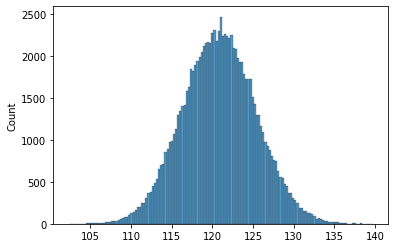

In [ ]:
medias = []

for i in range(100_000):
    muestra = df['glucose'].sample(n=50,replace=True)
    medias.append(muestra.mean())

medias_serie = pd.Series(medias)
sns.histplot(medias_serie)

In [ ]:
#skew = 0 = simetria
medias_serie.skew()

0.03809601462384806

In [ ]:
#kurtosis = 0 = ni muy picuda ni muy plana
medias_serie.kurtosis()

-0.00913889360053144

## Error Estándar

In [ ]:
print(f'error estandar:{medias_serie.std()}')

error estandar:4.527298115515066


In [ ]:
print(f'valor min:{medias_serie.min()}')
print(f'valor max:{medias_serie.max()}')
print(f'Rango:{medias_serie.max() - medias_serie.min()}')

valor min:102.64
valor max:141.44
Rango:38.8


## Intervalo de confianza

In [ ]:
lim_inferior = medias_serie.quantile(0.025)
lim_superior = medias_serie.quantile(0.975)

print(f'Intervalo de confianza al 95%: {lim_inferior} < {medias_serie.mean()} < {lim_superior}')

Intervalo de confianza al 95%: 112.06 < 120.90925599999997 < 129.86


In [ ]:
#media_de_intervalos = (medias_serie.mean() - lim_inferior) + lim_superior - medias_serie.mean())/2
media_de_intervalos = (- lim_inferior + lim_superior) /2
print(f'Intervalo de confianza al 95%: {medias_serie.mean():.4f} +/- {media_de_intervalos:.4f}')


Intervalo de confianza al 95%: 120.9093 +/- 8.9000


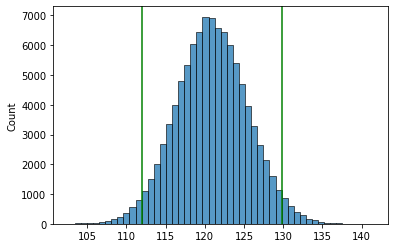

In [ ]:
sns.histplot(medias_serie,bins=50)
plt.axvline(lim_superior,c='g')
plt.axvline(lim_inferior,c='g')

## Entrenamiento y prueba

<AxesSubplot:>

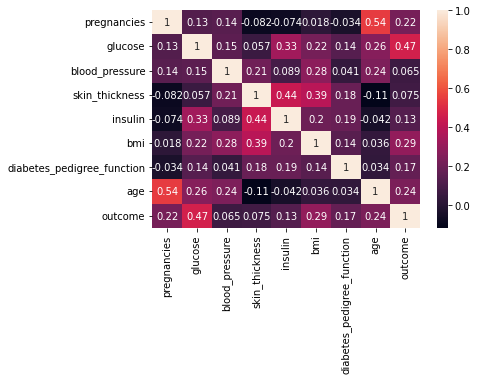

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression

In [ ]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df[['glucose','skin_thickness']]
y = df['insulin']

In [ ]:
X_training, X_test, y_training, y_test = train_test_split(X,y,test_size=0.3, shuffle=True)

In [ ]:
lr = LinearRegression()
lr.fit(X_training, y_training)


LinearRegression()

In [ ]:
lr.score(X_test,y_test)

0.27596012995826347

In [ ]:
lr_2 = LinearRegression()
lr_2.fit(X,y)
lr_2.score(X,y)


0.28491868235030937

## Correlacion cruzada

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
lr = LinearRegression()

scores = cross_validate(lr,X,y, scoring='r2', cv=4) #Se pasan todos los valores, no se tiene que hacer fit

In [ ]:
scores

{'fit_time': array([0.00444555, 0.00202775, 0.00198817, 0.00204229]),
 'score_time': array([0.00201964, 0.00158   , 0.00153923, 0.00154328]),
 'test_score': array([0.33915214, 0.31083397, 0.24582468, 0.18782375])}

Los datos de la test_score tienen una varianza amplia

In [ ]:
print(f"{scores['test_score'].mean():.3f} +/- {scores['test_score'].std():.3f}")

0.271 +/- 0.059


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f8149d1c-e6b1-497a-9109-f01641a8231a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>